# MNIST Classification - Hello World of Machine Learning

## Getting the data

In [3]:
import sklearn.datasets as datasets

In [4]:
mnist = datasets.fetch_openml('mnist_784',data_home='./Data',as_frame = False)

c:\Users\vinee\anaconda3\envs\tfgpu\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X,y = mnist["data"],mnist["target"]

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

## Visualizing the data

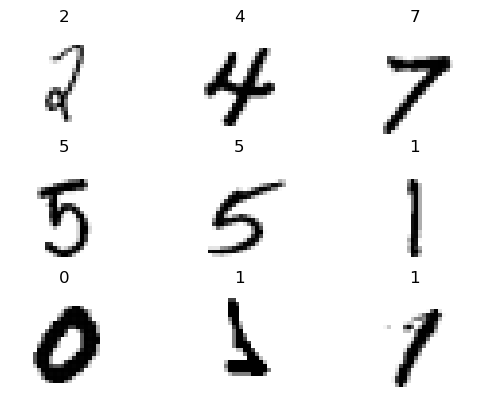

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1,10):
    plt.subplot(3,3,i)
    j = np.random.randint(0,len(X))
    plt.imshow(X[j].reshape(28,28)/255.,cmap = 'binary')
    plt.title(y[j])
    plt.axis('off')

## Dividing data into Training and Test set

In [10]:
# Converting labels from string to integers
y=y.astype(np.uint8)

The training and test sets are already predivided. We can separate them by slicing the X and y arrays.

In [11]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Training a model

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier is quite good for this task.

In [14]:
knc = KNeighborsClassifier(n_neighbors=4,weights = 'distance',n_jobs=-1)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

I actually found this set of parameters using GridSearchCV. The cell took around 40 minutes to run.

## Evaluating the model predictions

In [15]:
knc_preds = knc.predict(X_test)

In [16]:
print(classification_report(y_test,knc_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [17]:
print(confusion_matrix(y_test,knc_preds))

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  10    5  995    2    1    0    0   16    3    0]
 [   0    1    3  974    1   14    1    7    4    5]
 [   1    5    0    0  950    0    4    3    0   19]
 [   4    0    0    9    2  862    7    1    3    4]
 [   4    2    0    0    3    3  946    0    0    0]
 [   0   17    4    0    3    0    0  994    0   10]
 [   5    2    4   14    5   11    4    4  920    5]
 [   3    4    2    7    9    4    1   10    1  968]]


## Visualizing the wrong predictions

In [18]:
X_wrong = X_test[knc_preds!=y_test]
wrong_preds = knc_preds[knc_preds!=y_test]

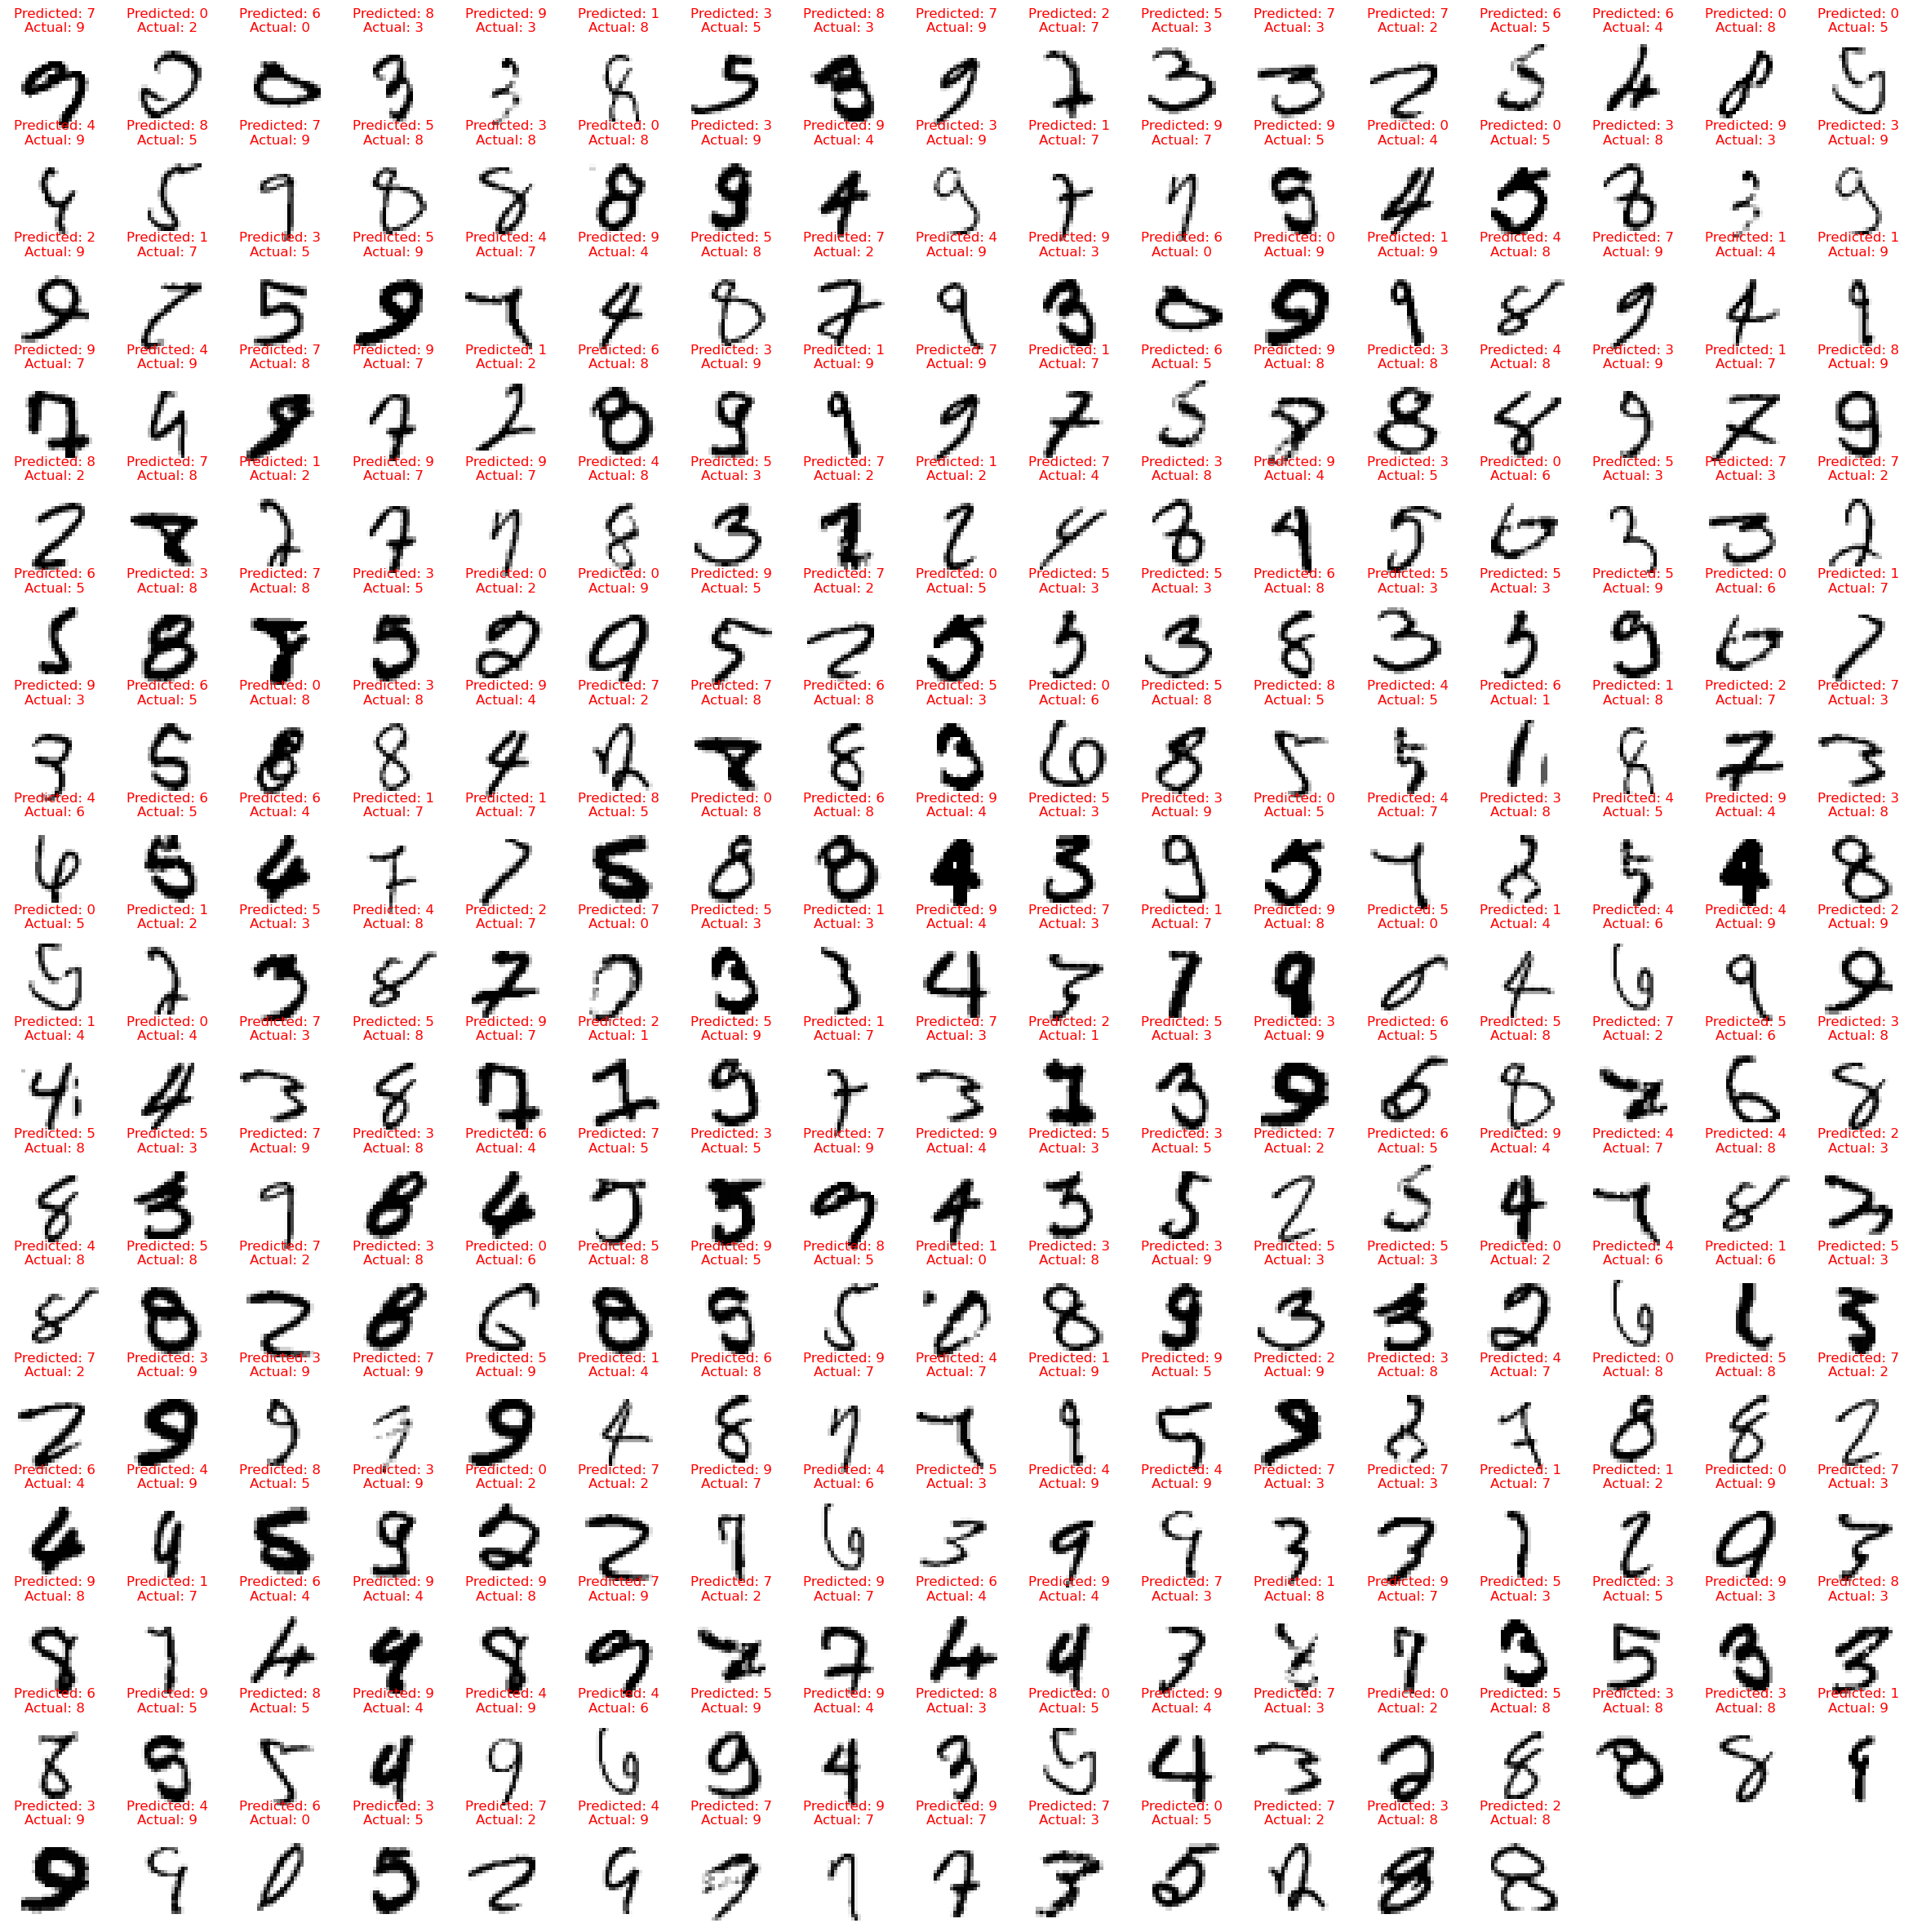

In [19]:
plt.figure(figsize = (30,30))
for i in range(1,len(X_wrong)+1):
    plt.subplot(17,17,i)
    j = np.random.randint(0,len(X_wrong))
    plt.imshow(X_wrong[j].reshape(28,28)/255.,cmap = 'binary')
    plt.title(f"Predicted: {wrong_preds[j]}\nActual: {y_test[knc_preds!=y_test][j]}",c="r")
    plt.axis('off')

I think we can improve this....

## Training our second model - DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(X,y)
print(classification_report(y_test,dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      1.00      1.00       892
           6       1.00      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [27]:
confusion_matrix(y_test,dtc.predict(X_test))

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int64)

Well, that was easy....